In [ ]:
def getdata():
    '''
    说明：
    1、本模块数据来源：中国Argo实时资料中心网站（或自然资源部杭州全球海洋Argo系统野外科学观测研究站）
    2、版权所属：自然资源部第二海洋研究所中国Argo实时资料中心
    3、编写者对用户因使用此模块产生的损失和不良后果不负任何法律责任。
    4、本模块采用匿名登录ftp方式下载数据。
    5、已知bug：受制于主机和服务器的带宽有一定概率下载失败，如果没有显示 '下载完毕。' 则一致认定为下载失败。
    WRITE BY YuHanxue in 2021.12.1 in OUC
    联系邮箱：hanxueyu555@gmail.com
    '''
    import os
    from ftplib import FTP
    print('数据来源：中国Argo实时资料中心网站（或自然资源部杭州全球海洋Argo系统野外科学观测研究站）')
    print('')
    print('已启动FTP下载模块')
    ftpserver = 'data.argo.org.cn'
    ftpath = '/pub/ARGO/BOA_Argo/NetCDF'
    localpath = './data/'
    bufsize = 1024
    ftp = FTP()
    try:
        ftp.connect(ftpserver, 21)
        ftp.login()
        ftp.cwd(ftpath)
    except:
        raise IOError('FTP数据连接失败，请检查您的网络环境')
    else:
        print(f'{ftpserver}欢迎信息:{ftp.getwelcome()}')
        print('FTP连接成功')
        print(f'成功进入FTP服务器：{ftp.pwd()}')
    # 查看ftp站点文件信息
    file_list = list(ftp.nlst())
    for i in range(13):
        file_list.pop()
    file_sta = (file_list[0]).split('_')
    file_end = (file_list[-1]).split('_')
    print('----------------')
    print(f'NC文件记录时间从{file_sta[2]:4}年{file_sta[3][0:2]:2}月', end='')
    print(f'到{file_end[2]:4}年{file_end[3][0:2]:2}月')
    print('！！！时间范围请参照上述时间！！！')
    print('----------------')
    # 下载数据
    if not os.path.exists(localpath):
        os.makedirs(localpath)
    print('请问需要单个数据还是批量数据？')
    print('1：单个数据')
    print('2：批量数据')
    judge = ''
    while judge == '':
        judge = int(input('请输入：'))
        if judge == 1 or judge == 2:
            break
    if judge == 1:
        filename = ''
        while filename not in file_list:            
            year = input('请输入年份：')
            mon = input('请输入月份：')
            filename = 'BOA_Argo_'+str(year)+'_'+str(mon).zfill(2)+'.nc'
        bufsize = 1024
        path = os.path.join(localpath, filename)
        with open(path, 'wb') as fid:
            print('正在下载：', filename)
            ftp.retrbinary('RETR {0}'.format(filename), fid.write, bufsize)
            print('下载完毕。')
    elif judge==2:
        file_down_start=''
        while file_down_start not in file_list:
            year = input('请输入起始年份：')
            mon = input('请输入起始月份：')
            file_down_start = 'BOA_Argo_'+str(year)+'_'+str(mon).zfill(2)+'.nc'
        file_down_start_index=file_list.index(file_down_start)
        file_down_end=''
        while file_down_end not in file_list:
            year = input('请输入终止年份：')
            mon = input('请输入终止月份：')
            file_down_end = 'BOA_Argo_'+str(year)+'_'+str(mon).zfill(2)+'.nc'
        file_down_end_index=file_list.index(file_down_end)
        for filename in file_list[file_down_start_index:file_down_end_index+1]:
                bufsize = 1024  
                path = os.path.join(localpath, filename)
                with open(path, 'wb') as fid:
                    print('正在下载：', filename)
                    ftp.retrbinary('RETR {0}'.format(filename), fid.write, bufsize)
                    print('下载完毕。')

In [ ]:
def picmake(Lon,Lat,data1,name):
    import numpy
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    for i in range(np.shape(data1)[1]):
        plt.cla()
        plt.figure(figsize=(20,10))
        ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
        ax.coastlines()
        data_drew = data1[0, i, :, :]
        plt.contour(Lon, Lat, data_drew,16, alpha=0.75,linewidths=0.5,colors='black',transform=ccrs.PlateCarree(central_longitude=0))
        c=plt.contourf(Lon, Lat, data_drew,16,transform=ccrs.PlateCarree(central_longitude=0))
        plt.colorbar(c)
        plt.title(f'depth={i}',fontsize='xx-large')
        name1='./pic/'+name+f'_depth={i}.jpg'
        plt.savefig(name1,dpi=72)
        plt.close()

In [ ]:
def gifmake(Lon,Lat,data1,name):
    import os
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
    name='./gif/'+name+'.gif'
    fig = plt.figure(figsize=(20,10))
    def updatefig(num):
        plt.cla()
        ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
        ax.coastlines()
        data_drew = data1[0, num, :, :]
        a=ax.contourf(Lon, Lat, data_drew,np.linspace(np.nanmin(data1),np.nanmax(data1),10),transform=ccrs.PlateCarree(central_longitude=0))
        b=ax.contour(Lon, Lat, data_drew,16,linewidths=0.5,alpha=0.75, colors='black',transform=ccrs.PlateCarree(central_longitude=0))
        plt.title(f'depth={num}',fontsize='xx-large')
        return ax
    ani = animation.FuncAnimation(fig, updatefig, frames = range(np.shape(data1)[1]))
    ani.save(name,fps=15)


In [ ]:
import os
import numpy as np
import netCDF4 as nc4
import shutil 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 模式选择
print('请选择数据来源')
print('1：调用FTP模块下载数据')
print('2：使用DEMO数据')
print('3：使用自定义BOA_Argo数据')
while True:
    judge=int(input('请输入您的决定：'))
    if judge in [1,2,3]:
        break
    else:
        print('错误输入，请重新输入')

def getnc(fl):
    a=[]
    for i in fl:
        if i[-2:]=='nc':
            a.append(i)
    return a
if judge==1:
    #清除遗留文件
    file_dir = './data'
    if  os.path.exists(file_dir):
        print('已检测到data文件夹内有文件，请转移，否则将清空。')
        shutil.rmtree('./data')
        os.makedirs('./data')
    #
    print('')
    print('---初始化成功---')
    print('正在进入FTP模块')
    print('')
    getdata()
    print('')
    print('-FTP模块运行结束-')
    file_list=list(os.listdir(file_dir))
    for i in range(len(file_list)):
        file_list[i]=file_dir+'/'+file_list[i]
    file_list=getnc(file_list)
    print('您将处理以下文件：')
    for i in range(len(file_list)):
        if i%3==2:
            print(f'{file_list[i]},')
        else:
            print(f'{file_list[i]},',end='')
    #print(file_list)


elif judge==2:
    #
    file_dir = './demo_data'
    file_list=list(os.listdir(file_dir))
    for i in range(len(file_list)):
        file_list[i]=file_dir+'/'+file_list[i]
    file_list=getnc(file_list)
    print('您将处理以下文件：')
    for i in range(len(file_list)):
        if i%3==2:
            print(f'{file_list[i]},')
        else:
            print(f'{file_list[i]},',end='')
    #print(file_list)

elif judge==3:
    #
    file_dir = './self_data'
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    print('请将文件放入self_data文件夹内')
    print('文件必须是BOA_Argo_yyyy_mm.nc格式，y指年份，m指月份')
    input('放置结束请按回车键')
    file_list=list(os.listdir(file_dir))
    file_list=getnc(file_list)
    for i in range(len(file_list)):
        file_list[i]=file_dir+'/'+file_list[i]
    print('您将处理以下文件：')
    for i in range(len(file_list)):
        if i%3==2:
            print(f'{file_list[i]},')
        else:
            print(f'{file_list[i]},',end='')
    #print(file_list)

本程序支持温度和盐度的可视化
温度选1
盐度选2
本程序支持生成gif和jpg
gif选1
jpg选2
已检测到gif文件夹内有文件，请转移，否则将清空。
正在处理./self_data/BOA_Argo_2005_12.nc
./self_data/BOA_Argo_2005_12.nc处理完毕
所有文件可视化完毕


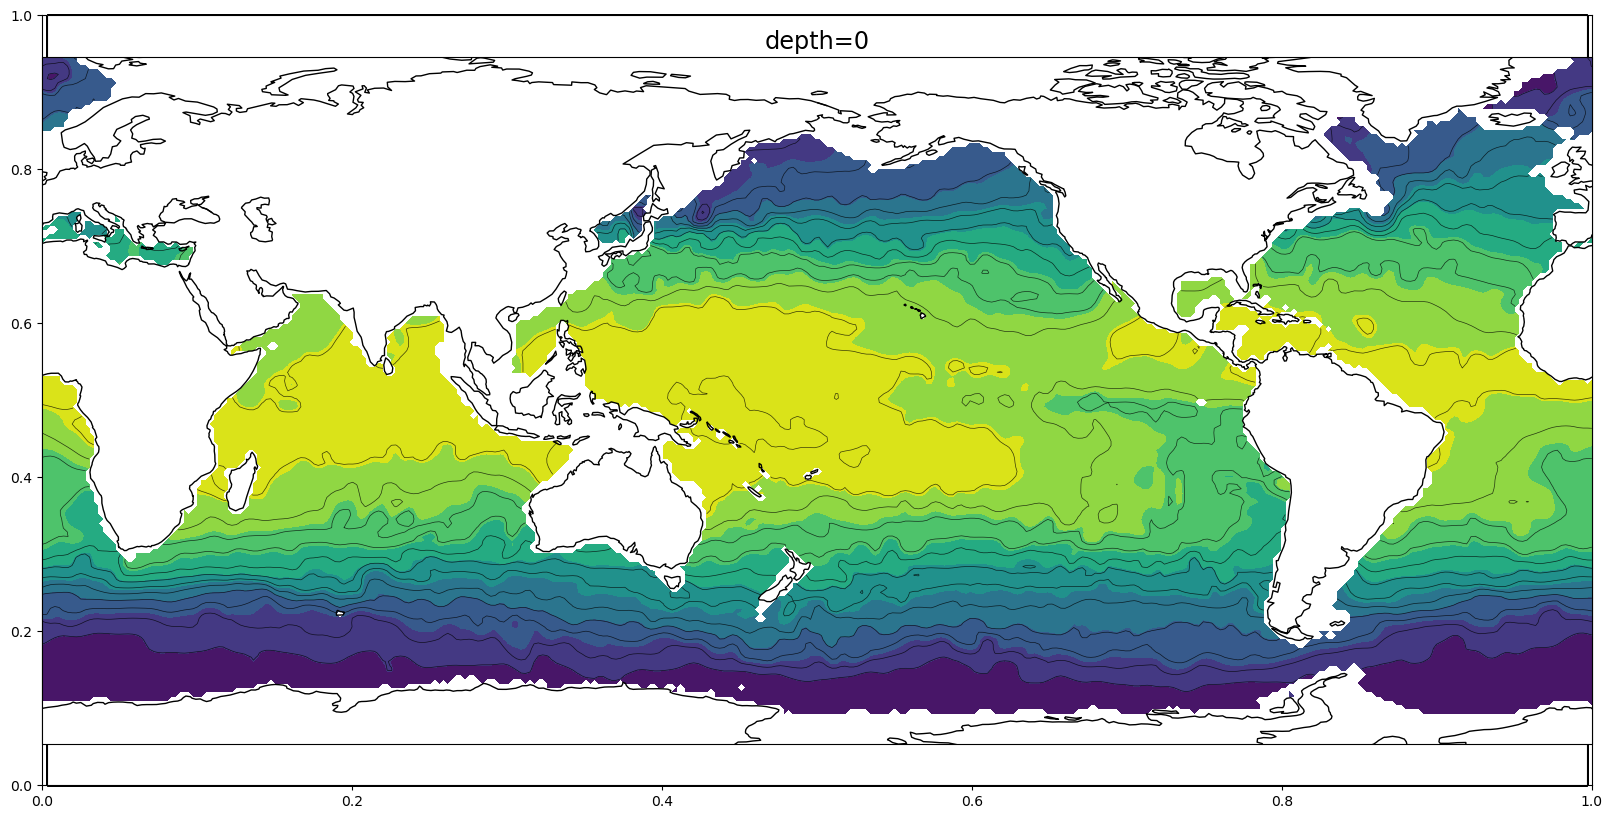

In [19]:
print('本程序支持温度和盐度的可视化')
print('温度选1\n盐度选2')
judge=0
while True:
    judge=int(input('请输入1或2：'))
    if judge in [1,2]:
        break
    else:
        print('错误输入，请重新输入')
if judge==1:
    var='temp'
else:
    var='salt'
print('本程序支持生成gif和jpg')
print('gif选1\njpg选2')
while True:
    judge=int(input('请输入1或2：'))
    if judge in [1,2]:
        break
    else:
        print('错误输入，请重新输入')
if judge==1:
    func=gifmake
    file_dir = './gif'
    if  os.path.exists(file_dir):
        print('已检测到gif文件夹内有文件，请转移，否则将清空。')
        input()
        shutil.rmtree('./gif')
        os.makedirs('./gif')
    else:
        print('已检测到gif文件夹不存在,将创建。')
        os.makedirs('./gif')
else:
    func=picmake
    file_dir = './pic'
    if  os.path.exists(file_dir):
        print('已检测到pic文件夹内有文件，请转移，否则将清空。')
        input()
        shutil.rmtree('./pic')
        os.makedirs('./pic')
    else:
        print('已检测到pic文件夹不存在,将创建。')
        os.makedirs('./pic')
for fil in file_list:
    file_name=var+'_of_'+fil.split('/')[-1]
    data = nc4.Dataset(fil)
    lon = data.variables['lon']
    lat = data.variables['lat']
    data1 = np.array(data.variables[var])
    data1[data1>7000.0]=np.nan
    data1[data1<-7000.0]=np.nan
    lat = slice(np.min(lat), np.max(lat)+lat[1]-lat[0], lat[1]-lat[0])
    lon = slice(np.min(lon), np.max(lon)+lon[1]-lon[0], lon[1]-lon[0])
    Lat, Lon = np.mgrid[lat, lon]
    print(f'正在处理{fil}')
    func(Lon,Lat,data1,file_name[:-3])
    print(f'{fil}处理完毕')
print('所有文件可视化完毕')

In [18]:
np.array(data[var])

array([[[[ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         [ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         [ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         ...,
         [ 2.6099e+00,  2.2613e+00,  2.1621e+00, ...,  2.0539e+00,
           1.9122e+00,  2.6316e+00],
         [ 3.2492e+00,  2.9315e+00,  2.9341e+00, ...,  2.3117e+00,
           2.2053e+00,  2.6506e+00],
         [ 3.7610e+00,  3.4802e+00,  3.5227e+00, ...,  2.4656e+00,
           2.5692e+00,  2.9679e+00]],

        [[ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         [ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         [ 9.9999e+04,  9.9999e+04,  9.9999e+04, ...,  9.9999e+04,
           9.9999e+04,  9.9999e+04],
         ...,
         [ 2.5928e+00,  2.2303e+00